# Automatic Segmentation Algorithm

In this Notebook, we display the code for automatic segmentation using convex optimization to solve for a threshold value. The anomaly used is that of a 60mm anomaly.

In [4]:
# Initializations
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

In [1250]:
from skimage import io
from matplotlib import pyplot as plt

# Importing the Image
image = io.imread('C:/Users/user/Desktop/60_1.jpg')

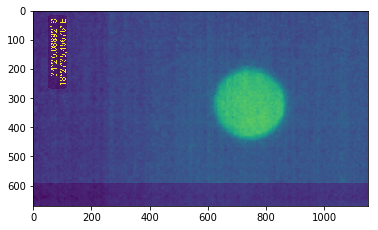

In [1251]:
from skimage.color import rgb2gray 

# Convert colour image to viridis (default greyscale) 
virid = rgb2gray(image)

#Cropping the image to remove the colourscale
cropped = virid[0:670,50:1200]

#Plotting the Greyscaled image as a default viridis colourmap
plt.imshow(cropped)

The function below is that used to test the threshold achieved from the optimization algorithm named 'og'

In [1252]:
import scipy as sp
from skimage.measure import shannon_entropy

markers = np.zeros_like(cropped) # creating a zero matrix like the current image
markers[cropped < 0.719] = 0 # All pixel values in cropped that are less than 0.719 must be equal to 0 in markers
markers[cropped > 0.719] = 1 # All pixel values in cropped that are greater than 0.719 must be equal to 1 in markers

markers1 = sp.ndimage.morphology.binary_fill_holes(markers).astype(int)
    
for i in range(markers1.shape[0]-10):
    for j in range(markers1.shape[1]-10):

        if ((markers1[i+1,j] + markers1[i-1,j] + markers1[i,j+1] + markers1[i,j-1] + markers1[i-1,j-1] + markers1[i+1,j+1] + markers1[i+1,j-1] + markers1[i-1,j+1]) <= 3 ):         
                markers1[i,j] = 0
            
        if ((markers1[i+2,j] + markers1[i-2,j] + markers1[i,j+2] + markers1[i,j-2] + markers1[i-2,j-2] + markers1[i+2,j+2] + markers1[i+2,j-2] + markers1[i-2,j+2]) <= 3 ):         
                markers1[i,j] = 0
            
        if ((markers1[i+3,j] + markers1[i-3,j] + markers1[i,j+3] + markers1[i,j-3] + markers1[i-3,j-3] + markers1[i+3,j+3] + markers1[i+3,j-3] + markers1[i-3,j+3]) <= 3 ):         
                markers1[i,j] = 0
            
        if ((markers1[i+10,j] + markers1[i-10,j] + markers1[i,j+10] + markers1[i,j-10] + markers1[i-10,j-10] + markers1[i+10,j+10] + markers1[i+10,j-10] + markers1[i-10,j+10]) <= 3 ):         
                markers1[i,j] = 0

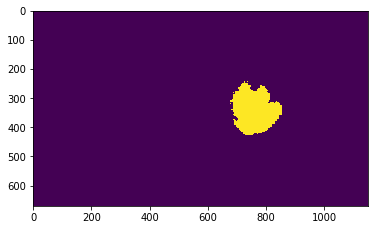

In [1253]:
plt.imshow(markers1)

In [1254]:
#Count the number of white pixels
t = 0
for i in range(markers1.shape[0]):
    for j in range(markers1.shape[1]):
        if markers1[i,j] == 1:
            t = t + 1
print(t)

21526


In [1256]:
#Indicate the area of the anomaly via the number of white pixels
import math
OD = 750
Area = ((4*OD**2)*(math.tan(math.radians(16))*math.tan(math.radians(8.4)))/921600)*t
print(Area)

2225.2751940121607


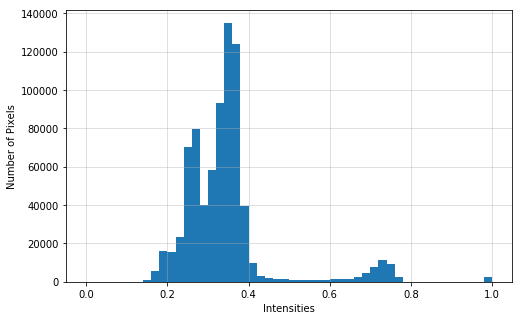

In [788]:
#General Histogram plot of the intensities of the image

#Initializations
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Specifying the size of the figure
plt.figure(figsize=(8,5))


# Adding Labels to the plots
plt.xlabel('Intensities')
plt.ylabel('Number of Pixels')

# Adding a grid
plt.grid(axis='y', alpha = 0.5)
plt.grid(axis='x', alpha = 0.5)

img = cropped
plt.hist(img.ravel(),50,[0,1])
plt.show()

(array([6.21890547e-06, 1.11940299e-05, 2.23880597e-05, 3.35820896e-05,
        4.97512438e-05, 7.46268657e-05, 1.65422886e-04, 3.07213930e-04,
        5.85820896e-04, 1.01990050e-03, 1.74004975e-03, 1.97014925e-03,
        2.80472637e-03, 3.97388060e-03, 5.94776119e-03, 8.37935323e-03,
        1.20783582e-02, 1.56815920e-02, 2.01305970e-02, 2.09875622e-02,
        2.66343284e-02, 3.10982587e-02, 3.52786070e-02, 4.00435323e-02,
        4.33793532e-02, 4.71517413e-02, 5.00708955e-02, 5.01778607e-02,
        5.37947761e-02, 5.91641791e-02, 6.54962687e-02, 7.44029851e-02,
        8.32512438e-02, 9.40049751e-02, 1.02949005e-01, 1.10300995e-01,
        1.26126866e-01, 1.45281095e-01, 1.70917910e-01, 1.96199005e-01,
        2.23157960e-01, 2.45825871e-01, 2.62452736e-01, 2.66873134e-01,
        2.86526119e-01, 3.02725124e-01, 3.15283582e-01, 3.25293532e-01,
        3.34562189e-01, 3.43718905e-01, 3.53820896e-01, 3.53863184e-01,
        3.65046020e-01, 3.77364428e-01, 3.91213930e-01, 4.079042

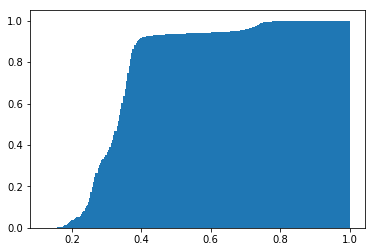

In [19]:
plt.hist(img.ravel(), 256, density=True, histtype='bar',
                           cumulative=True, label='Empirical')

In [46]:
from scipy.stats import norm

print(norm.cdf(cropped.ravel()))


[0.59300977 0.59300977 0.59300977 ... 0.59463467 0.5991889  0.60070402]


This Function 'og' is the function that is responsible for the automatic segmentaion with the in put window size threshold

In [1214]:
def og (x): #Defining the function
    #Initializations
    import scipy as sp
    from skimage.measure import shannon_entropy

    markers = np.zeros_like(cropped) # creating a zero matrix like the current image
    markers[cropped < x] = 0 # All pixel values in cropped that are less than x must be equal to 0 and placed in markers    
    markers[cropped > x] = 1 # All pixel values in cropped that are greater than x must be equal to 1 and placed in markers

    markers1 = sp.ndimage.morphology.binary_fill_holes(markers).astype(int) # Filling any holes
    p = markers1[markers1 == 1].size # indicating the number of white pixels
    
    if (p < 27351):         #Inputting the Window threshold
        p = cropped.size            
    
    #The following for loop is a filter that cleans the edeges of large objects and removes small unwanted obejects
    for i in range(markers1.shape[0]-10):
        for j in range(markers1.shape[1]-10):

            if ((markers1[i+1,j] + markers1[i-1,j] + markers1[i,j+1] + markers1[i,j-1] + markers1[i-1,j-1] + markers1[i+1,j+1] + markers1[i+1,j-1] + markers1[i-1,j+1]) <= 3 ):         
                   markers1[i,j] = 0
            
            if ((markers1[i+2,j] + markers1[i-2,j] + markers1[i,j+2] + markers1[i,j-2] + markers1[i-2,j-2] + markers1[i+2,j+2] + markers1[i+2,j-2] + markers1[i-2,j+2]) <= 3 ):         
                markers1[i,j] = 0
            
            if ((markers1[i+3,j] + markers1[i-3,j] + markers1[i,j+3] + markers1[i,j-3] + markers1[i-3,j-3] + markers1[i+3,j+3] + markers1[i+3,j-3] + markers1[i-3,j+3]) <= 3 ):         
                markers1[i,j] = 0
            
            if ((markers1[i+10,j] + markers1[i-10,j] + markers1[i,j+10] + markers1[i,j-10] + markers1[i-10,j-10] + markers1[i+10,j+10] + markers1[i+10,j-10] + markers1[i-10,j+10]) <= 3 ):         
                markers1[i,j] = 0
        
    return(p); # Rerturning the Number of White Pixels

In [1215]:
# Initializations
import numpy as np
import matplotlib.pyplot as mp 
import scipy as sp
from scipy import optimize
from scipy import fftpack
from numpy import unique
from scipy.stats import entropy as scipy_entropy
from skimage.measure import shannon_entropy

#Applying the optimization code 
result = optimize.minimize_scalar(og, bounds = (0,1), method = 'bounded')

#Printing the optimized result with threshold x
print(result)

     fun: 28187
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 0.7194446301341553


In [966]:
#Function created to plot the Shannon Entropy 
def function (x):
    
    import scipy as sp
    from skimage.measure import shannon_entropy

    markers = np.zeros_like(cropped) # creating a zero matrix like the current image
    markers[cropped < x] = 0 # All pixel values in cropped that are less than x must be equal to 0 and placed in markers    
    markers[cropped > x] = 1 # All pixel values in cropped that are greater than x must be equal to 1 and placed in markers    

    markers1 = sp.ndimage.morphology.binary_fill_holes(markers).astype(int)
            
    return(np.asscalar(shannon_entropy(markers1, base=2)));

In [1155]:
# Functions created too get the data returned from the results of 'og' and 'function'
i = 0;
x = []
my_arr = []
while (i < 100):
    i = i + 1
    x.append(i*0.01)
    my_arr.append(og(x = i*0.01))

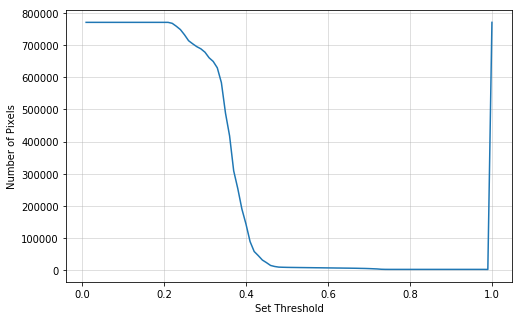

In [1156]:
# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding a grid
plt.grid(axis='y', alpha = 0.5)
plt.grid(axis='x', alpha = 0.5)

# Adding Labels to the plots
plt.xlabel('Set Threshold')
plt.ylabel('Number of Pixels')
plt.plot(x,my_arr)

In [828]:
# Functions created too get the data returned from the results of 'og' and 'function'
i = 0;
x = []
my_arr = []
while (i < 100):
    i = i + 1
    x.append(og(x = i*0.01))
    my_arr.append(function(x = i*0.01))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2508: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


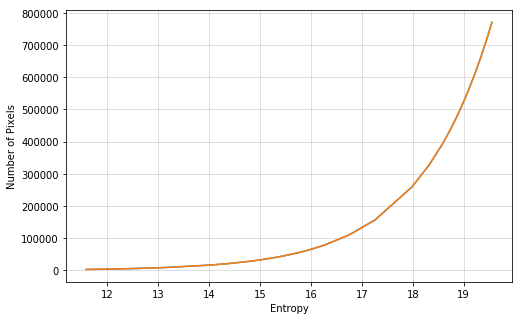

In [829]:
# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding a grid
plt.grid(axis='y', alpha = 0.5)
plt.grid(axis='x', alpha = 0.5)

# Adding Labels to the plots
plt.xlabel('Entropy')
plt.ylabel('Number of Pixels')
plt.plot(x,my_arr)

plt.plot(x,my_arr)

## Results 

This section indiactes the results achieved from the manual segmentation fo the anomalies at differnt distances from the target.

# 60mm Anomaly

In [756]:
Calc = [4267.37, 2363.31, 3784.52, 4140.22, 3881.15]
Real = [2827.43, 2827.43, 2827.43, 2827.43, 2827.43]
Dist = [750, 1750, 2750, 3750, 4750]

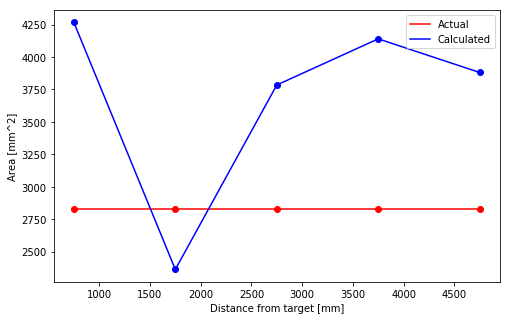

In [771]:
from numpy import *
import math
import matplotlib.pyplot as plt

# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding Labels to the plots
plt.xlabel('Distance from target [mm]')
plt.ylabel('Area [mm^2]')

plt.plot(Dist, Real, 'ro') # plotting t, a separately
plt.plot(Dist, Real, 'r' , label = 'Actual') # plotting t, a separately
plt.plot(Dist, Calc, 'bo') # plotting t, b separately
plt.plot(Dist, Calc, 'b', label = 'Calculated') # plotting t, b separately

# Add a legend
plt.legend()

plt.show()

# 40mm Anomaly

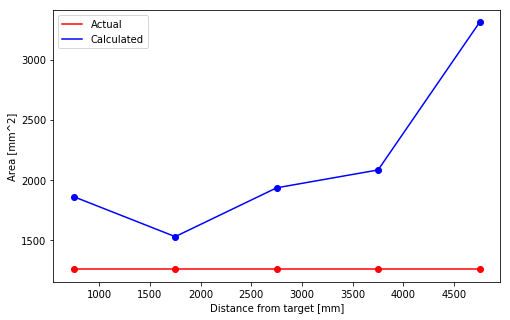

In [772]:
#Initializations
Calc = [1860.98, 1529.20, 1934.64, 2083.03, 3308.93]
Real = [1256.64, 1256.64, 1256.64, 1256.64, 1256.64]
Dist = [750, 1750, 2750, 3750, 4750]

# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding Labels to the plots
plt.xlabel('Distance from target [mm]')
plt.ylabel('Area [mm^2]')

plt.plot(Dist, Real, 'ro') # plotting t, a separately
plt.plot(Dist, Real, 'r' , label = 'Actual') # plotting t, a separately
plt.plot(Dist, Calc, 'bo') # plotting t, b separately
plt.plot(Dist, Calc, 'b', label = 'Calculated') # plotting t, b separately

# Add a legend
plt.legend()

plt.show()

# 30mm Anomaly

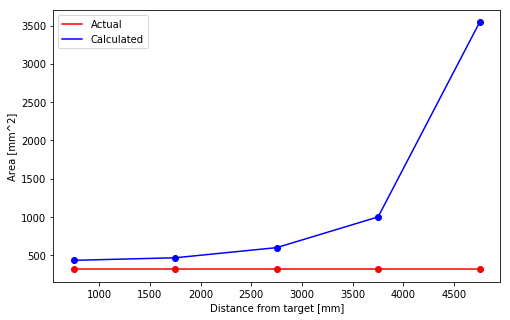

In [773]:
Calc = [433.25, 466.58, 599.02, 1000.16, 3541.14]
Real = [314.16, 314.16, 314.16, 314.16, 314.16]
Dist = [750, 1750, 2750, 3750, 4750]

# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding Labels to the plots
plt.xlabel('Distance from target [mm]')
plt.ylabel('Area [mm^2]')

plt.plot(Dist, Real, 'ro') # plotting t, a separately
plt.plot(Dist, Real, 'r' , label = 'Actual') # plotting t, a separately
plt.plot(Dist, Calc, 'bo') # plotting t, b separately
plt.plot(Dist, Calc, 'b', label = 'Calculated') # plotting t, b separately

# Add a legend
plt.legend()

plt.show()

# 20mm Anomaly

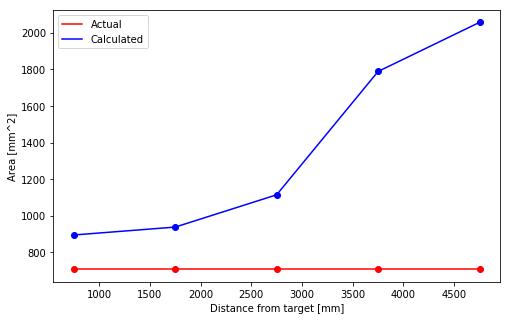

In [774]:
Calc = [895.13, 938.23, 1114.65, 1788.41, 2056.68]
Real = [706.86, 706.86, 706.86, 706.86, 706.86,]
Dist = [750, 1750, 2750, 3750, 4750]

# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding Labels to the plots
plt.xlabel('Distance from target [mm]')
plt.ylabel('Area [mm^2]')

plt.plot(Dist, Real, 'ro') # plotting t, a separately
plt.plot(Dist, Real, 'r' , label = 'Actual') # plotting t, a separately
plt.plot(Dist, Calc, 'bo') # plotting t, b separately
plt.plot(Dist, Calc, 'b', label = 'Calculated') # plotting t, b separately

# Add a legend
plt.legend()

plt.show()

# 10mm Anomaly

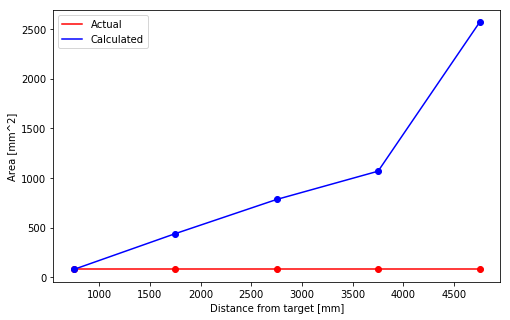

In [775]:
Calc = [77.43, 437.87, 782.47, 1067.36, 2566.70]
Real = [78.54, 78.54, 78.54, 78.54, 78.54]
Dist = [750, 1750, 2750, 3750, 4750]

# Specifying the size of the figure
plt.figure(figsize=(8,5))

# Adding Labels to the plots
plt.xlabel('Distance from target [mm]')
plt.ylabel('Area [mm^2]')

plt.plot(Dist, Real, 'ro') # plotting t, a separately
plt.plot(Dist, Real, 'r' , label = 'Actual') # plotting t, a separately
plt.plot(Dist, Calc, 'bo') # plotting t, b separately
plt.plot(Dist, Calc, 'b', label = 'Calculated') # plotting t, b separately

# Add a legend
plt.legend()

plt.show()